# Diplomatura de Especialización en Desarrollo de Aplicaciones con Inteligencia Artificial - Inteligencia Artificial para Juegos (Game IA) - Sesión 4 - Tarea

<img src='https://www.danielsaromo.xyz/assets/img/logo-pucp.png' width=200px>


Dr. Edwin Villanueva, Ing. Daniel Saromo

<font color='orange'>Creación de modelos de ML supervisado para Behavioral Cloning en el entorno Pacman UCB 3.6</font>

En este notebook se implementan códigos que permiten la generación de la arquitectura y del modelo de Behavioral Cloning, para ser usados en el entorno Pacman UCB 3.6.

Fuente original del entorno de juego: https://inst.eecs.berkeley.edu/~cs188/sp21/project2/

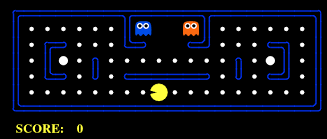

El conjunto de datos para trabajar el proyecto contiene 5 clases a predecir (0: `Stop`, 1: `East`, 2: `North`, 3: `West`, y 4: `South`).

Donde cada clase se refiere a una acción a tomar utilizando información de **10 features** extraidos de un `GameState` del entorno de juego Pacman UCB:

Features:
1. 'posx_g1_fromPacman' **('g1x')**
2. 'posy_g1_fromPacman' **('g1y')**
3. 'posx_g2_fromPacman' **('g2x')**
4. 'posy_g2_fromPacman' **('g2y')**
5. 'capsulas_restantes' **('caps')**
6. 'manhattan_dist_toClosest_ghost' **('dist_ghost')**
7. 'manhattan_dist_toClosest_caps' **('dist_caps')**
8. 'mean_manhDist_5_closests_dots' **('dist_5dots')**
9. **'score'**
10.'cant_scared_ghosts' **('scared')**

Target:
11. **'action'**


**TAREA (5 puntos en total por este notebook y los archivos a generarse con el mismo):**

Nota: El puntaje total del desafío de la semana son 20 puntos. Consultar las diapositivas para ver las instrucciones relacionadas al puntaje restante.

Completar los campos de código requeridos y aplicar la metodología de Behavioral Cloning para generar un archivo con un modelo de ML. Este archivo deberá poder ser utilizado para controlar un agente Pacman en el entorno de Pacman UCB 3.6.

<font color='red'>Se solicita que el accuracy mínimo de su modelo de inferencia usado en el entorno de Pacman tenga un **accuracy mayor a 50%**.</font>

Completar con su código los campos requeridos y subir su notebook solucionado a la plataforma PAIDEIA. El formato del nombre del notebook es: `Desafio4_Grupo3.ipynb`, siendo `3` el número del grupo.

Es responsabilidad del alumno verificar que el archivo que subió es el correcto. Respetar los lineamientos de la entrega de archivo, ya que influirá en su calificación. La fecha límite de entrega del presente desafío se encuentra en PAIDEIA.

Integrantes del grupo:

- [Sí trabajó] Walter Valverde
- [Sí trabajó] Carlos Raymundo
- [Sí trabajó] Miguel Vega

En la lista de integrantes, indicar si el estudiante contribuyó o no en el trabajo grupal.

## Verificar que se tenga todo el software de ML instalado

In [2]:
!wget -N https://raw.githubusercontent.com/DanielSaromo/Pacman_UCB_Behavioral_Cloning/main/requirements.txt

--2024-01-19 02:49:31--  https://raw.githubusercontent.com/DanielSaromo/Pacman_UCB_Behavioral_Cloning/main/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]      85  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2024-01-19 02:49:31 (2.57 MB/s) - ‘requirements.txt’ saved [85/85]



In [3]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 32.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: pyparsing
    Found existing install

## Paso 1: Cargar e inspeccionar los datos

NO OLVIDAR RESETEAR EL ENTORNO LUEGO DE INSTALAR LAS LIBRERÍAS.

In [1]:
# version de Python
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
# keras
import keras
print('keras: {}'.format(keras.__version__))

import pickle # para cargar y grabar archivos

Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
scipy: 1.11.4
numpy: 1.23.5
matplotlib: 3.7.2
pandas: 2.1.0
sklearn: 1.3.0
keras: 2.12.0


### 1.1) Primero hay que importar todas las librerias y modulos que se usará

In [2]:
# Librerias base que se usaran
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split    # para validacion y selecion de modelos
from sklearn.model_selection import cross_val_score     # para validacion y selecion de modelos
from sklearn.model_selection import KFold               # para generar k-folds para validacion y selecion de modelos
from sklearn.preprocessing import LabelEncoder          # para reetiquetar labels con valores numericos
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score  # para manejar metricas de desempeño
from sklearn.metrics import confusion_matrix  # para manejar matrices de confusion
from sklearn.metrics import classification_report  # para hacer reportes de resultados de clasificacion

# Librerias de diferentes Modelos de ML
from keras.models import Sequential   # Para crear holders de Redes neuronales
from keras.layers import Dense        # Para crear capas de Redes neuronales  fully-connected
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.linear_model import LogisticRegression # para usar modelos de regresion logistica
from sklearn.tree import DecisionTreeClassifier     # para usar modelos de tipo arboles de decision
from sklearn.neighbors import KNeighborsClassifier  # para modelos  Knn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # para modelos discriminantes lineales
from sklearn.naive_bayes import GaussianNB   # para modelos Naive Bayes
from sklearn.svm import SVC   # para modelos SVM
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler

Puede importar otras librerías, si es que así lo requiere.

### 1.2) Cargar el dataset

In [3]:
!wget -O 'datosRecolectadosTotal.csv' https://media.githubusercontent.com/media/miguelvg27/ia-pucp-juegos-trabajo/main/data/datosRecolectadosTotal.csv

--2024-01-19 02:53:23--  https://media.githubusercontent.com/media/miguelvg27/ia-pucp-juegos-trabajo/main/data/datosRecolectadosTotal.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14962510 (14M) [text/plain]
Saving to: ‘datosRecolectadosTotal.csv’

datosRecolectadosTo 100%[===================>]  14.27M  87.9MB/s    in 0.2s    

2024-01-19 02:53:24 (87.9 MB/s) - ‘datosRecolectadosTotal.csv’ saved [14962510/14962510]



In [4]:
url = "datosRecolectadosTotal.csv"
names = ['g1x', 'g1y','g2x','g2y','caps','dist_ghost','dist_caps','dist_5dots','score','scared','ady_w','ady_e','ady_n','ady_s','pacx','pacy','l1_dots','l2_dots','l3_dots','l4_dots','action']

dataset = pandas.read_csv(url, names=names)

### 1.3) Inspeccionar los datos

In [5]:
dataset

,g1x,g1y,g2x,g2y,caps,dist_ghost,dist_caps,dist_5dots,score,scared,...,ady_e,ady_n,ady_s,pacx,pacy,l1_dots,l2_dots,l3_dots,l4_dots,action
0,-1.0,4.0,2.0,4.0,2.0,5.0,9.0,2.8,0.0,0.0,...,4.0,2.0,2.0,0.0,-4.0,25.0,25.0,22.0,21.0,0.0
1,-1.0,4.0,2.0,4.0,2.0,5.0,9.0,2.8,0.0,0.0,...,4.0,2.0,2.0,0.0,-4.0,25.0,25.0,22.0,21.0,0.0
2,-1.0,4.0,2.0,4.0,2.0,5.0,9.0,2.8,0.0,0.0,...,4.0,2.0,2.0,0.0,-4.0,25.0,25.0,22.0,21.0,0.0
3,0.0,4.0,1.0,4.0,2.0,4.0,9.0,2.8,-1.0,0.0,...,4.0,2.0,2.0,0.0,-4.0,25.0,25.0,22.0,21.0,0.0
4,0.0,4.0,1.0,4.0,2.0,4.0,9.0,2.8,-1.0,0.0,...,4.0,2.0,2.0,0.0,-4.0,25.0,25.0,22.0,21.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75730,7.0,2.0,0.0,4.0,2.0,4.0,4.0,1.8,100.0,0.0,...,3.0,4.0,4.0,-8.0,0.0,19.0,25.0,22.0,15.0,0.0
75731,8.0,2.0,0.0,3.0,2.0,3.0,4.0,1.8,99.0,0.0,...,3.0,4.0,4.0,-8.0,0.0,19.0,25.0,22.0,15.0,2.0
75732,8.0,2.0,0.0,3.0,2.0,3.0,4.0,1.8,99.0,0.0,...,3.0,4.0,4.0,-8.0,0.0,19.0,25.0,22.0,15.0,2.0
75733,8.0,2.0,0.0,3.0,2.0,3.0,4.0,1.8,99.0,0.0,...,3.0,4.0,4.0,-8.0,0.0,19.0,25.0,22.0,15.0,2.0


In [6]:
# descripcion estadistica
dataset.describe()

,g1x,g1y,g2x,g2y,caps,dist_ghost,dist_caps,dist_5dots,score,scared,...,ady_e,ady_n,ady_s,pacx,pacy,l1_dots,l2_dots,l3_dots,l4_dots,action
count,75735.000000,75735.000000,75735.000000,75735.000000,75735.000000,75735.000000,75735.000000,75735.000000,75735.000000,75735.000000,...,75735.000000,75735.000000,75735.000000,75735.000000,75735.000000,75735.000000,75735.000000,75735.000000,75735.000000,75735.000000
mean,0.146999,0.984565,-0.026474,0.896785,1.003235,7.487767,14.087040,3.536678,356.286855,0.745507,...,2.935723,2.772985,2.667274,0.315983,-0.625074,13.873718,15.490447,16.283898,11.721265,1.670932
std,7.876012,3.852910,7.894062,3.872469,0.761217,3.700666,6.504139,1.839816,286.632408,0.925207,...,0.801742,0.833087,0.766976,5.517634,2.784054,10.347824,9.567504,7.700180,5.689348,1.423255
min,-17.000000,-8.000000,-17.000000,-8.000000,0.000000,1.000000,1.000000,1.000000,-19.000000,0.000000,...,1.000000,1.000000,1.000000,-8.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.000000,-2.000000,-6.000000,-2.000000,0.000000,5.000000,9.000000,2.400000,111.000000,0.000000,...,2.000000,2.000000,2.000000,-5.000000,-4.000000,2.000000,8.000000,11.000000,7.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,7.000000,16.000000,3.000000,293.000000,0.000000,...,3.000000,3.000000,2.000000,0.000000,-1.000000,13.000000,16.000000,22.000000,14.000000,2.000000
75%,6.000000,4.000000,6.000000,4.000000,2.000000,10.000000,20.000000,4.200000,569.000000,2.000000,...,4.000000,4.000000,3.000000,6.000000,2.000000,25.000000,25.000000,22.000000,15.000000,3.000000
max,17.000000,8.000000,17.000000,8.000000,2.000000,22.000000,25.000000,19.400000,1197.000000,2.000000,...,4.000000,4.000000,4.000000,9.000000,4.000000,25.000000,25.000000,22.000000,21.000000,4.000000


In [7]:
# distribucion de clases
print(dataset.groupby('action').size())

action
0.0    22815
1.0    14641
2.0    13111
3.0    14987
4.0    10181
dtype: int64


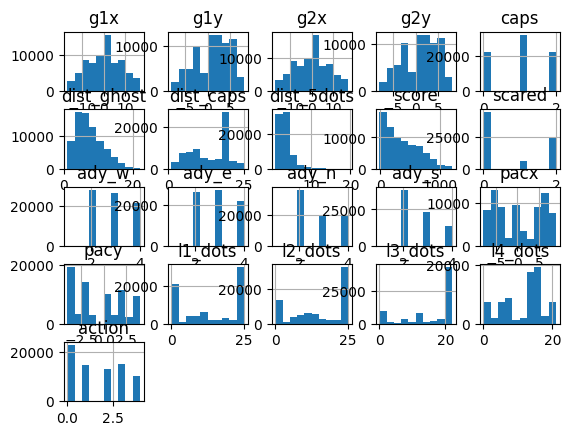

In [8]:
# histogramas
dataset.hist()
plt.show()

## Paso 2: Pre-procesar datos y crear modelos

### 2.1) Separa features y etiquetas y codifica etiquetas con numeros

In [9]:
array = dataset.values
array

array([[-1.,  4.,  2., ..., 22., 21.,  0.],
       [-1.,  4.,  2., ..., 22., 21.,  0.],
       [-1.,  4.,  2., ..., 22., 21.,  0.],
       ...,
       [ 8.,  2.,  0., ..., 22., 15.,  2.],
       [ 8.,  2.,  0., ..., 22., 15.,  2.],
       [ 8.,  0.,  0., ..., 22., 15.,  2.]])

Convertimos el DataFrame a un numpy array y luego normalizamos los datos:

In [10]:
# separa features y labels en 2 variables
X = array[:,:20]   # features
Y = array[:,20]     # labels

from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler((0, 1)).fit(X)

Xnn = scaler_X.transform(X)
Ynn  = Y

In [11]:
Xnn.dtype

dtype('float64')

Veamos las estadísticas de los datos normalizados:

In [12]:
ds = pandas.DataFrame(Xnn)
ds.describe()
ds

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.470588,0.750,0.558824,0.7500,1.0,0.190476,0.333333,0.097826,0.015625,0.0,1.000000,1.000000,0.333333,0.333333,0.470588,0.000,1.00,1.0,1.0,1.000000
1,0.470588,0.750,0.558824,0.7500,1.0,0.190476,0.333333,0.097826,0.015625,0.0,1.000000,1.000000,0.333333,0.333333,0.470588,0.000,1.00,1.0,1.0,1.000000
2,0.470588,0.750,0.558824,0.7500,1.0,0.190476,0.333333,0.097826,0.015625,0.0,1.000000,1.000000,0.333333,0.333333,0.470588,0.000,1.00,1.0,1.0,1.000000
3,0.500000,0.750,0.529412,0.7500,1.0,0.142857,0.333333,0.097826,0.014803,0.0,1.000000,1.000000,0.333333,0.333333,0.470588,0.000,1.00,1.0,1.0,1.000000
4,0.500000,0.750,0.529412,0.7500,1.0,0.142857,0.333333,0.097826,0.014803,0.0,1.000000,1.000000,0.333333,0.333333,0.470588,0.000,1.00,1.0,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75730,0.705882,0.625,0.500000,0.7500,1.0,0.142857,0.125000,0.043478,0.097862,0.0,0.333333,0.666667,1.000000,1.000000,0.000000,0.500,0.76,1.0,1.0,0.714286
75731,0.735294,0.625,0.500000,0.6875,1.0,0.095238,0.125000,0.043478,0.097039,0.0,0.333333,0.666667,1.000000,1.000000,0.000000,0.500,0.76,1.0,1.0,0.714286
75732,0.735294,0.625,0.500000,0.6875,1.0,0.095238,0.125000,0.043478,0.097039,0.0,0.333333,0.666667,1.000000,1.000000,0.000000,0.500,0.76,1.0,1.0,0.714286
75733,0.735294,0.625,0.500000,0.6875,1.0,0.095238,0.125000,0.043478,0.097039,0.0,0.333333,0.666667,1.000000,1.000000,0.000000,0.500,0.76,1.0,1.0,0.714286


In [13]:
targets = pandas.DataFrame(Ynn)
targets

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
75730,0.0
75731,2.0
75732,2.0
75733,2.0


Para visualizar los targets, una mejor gráfica sería un histograma:

array([[<Axes: title={'center': '0'}>]], dtype=object)

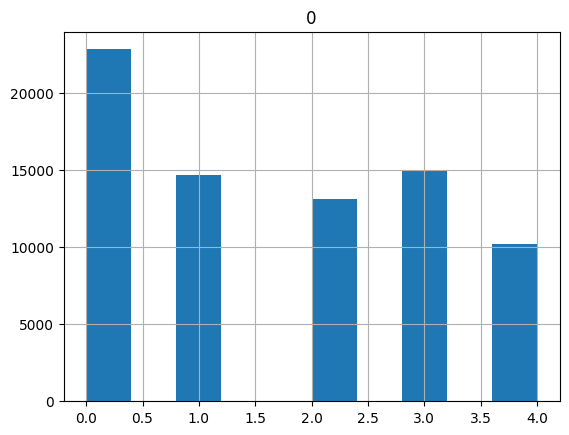

In [15]:
targets.hist()

### 2.2) Preparar los conjuntos de datos para entrenamiento y prueba

In [16]:
Xnn.shape, Ynn.shape

((75735, 20), (75735,))

No se realizó submuestreo para este caso.

In [18]:
X_submuestreado = Xnn.astype('float32')
Y_submuestreado = Ynn.astype('float32')

In [19]:
X_submuestreado.shape, Y_submuestreado.shape

((75735, 20), (75735,))

In [27]:
# Parte los datos en conjuntos de entrenamiento/prueba
test_size = 0.20
seed = 7   # semilla para la generacion de numeros aleatorios para la particion de los datos(para replicabilidad)

X_train, X_test, Y_train, Y_test = train_test_split(X_submuestreado, Y_submuestreado, test_size=test_size, random_state=seed)


In [28]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((60588, 20), (15147, 20), (60588,), (15147,))

In [29]:
Y_train.shape, Y_test.shape

((60588,), (15147,))

### 2.3) Entrenar y evaluar modelos

In [55]:
algos = []
algos.append(('LR', LogisticRegression()))
algos.append(('SVC', SVC()))
algos.append(('GaussianNB', GaussianNB()))
algos.append(('KNeighborsClassifier', KNeighborsClassifier()))
algos.append(('RandomForest', RandomForestClassifier()))
algos.append(('XGBClassifier',XGBClassifier()))

In [58]:
# Evaluamos cada algoritmo en estrategia de 10-fold-CV
results = []
names = []

# genera el particionamiento de 10 folds que seran usados en cada evaluacion
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle= True)  # especifica el particionador de datos a 10-folds CV

#  evalua cada algoritmo
for algoname, algo in algos:
    cv_results = cross_val_score(algo, X_train, Y_train, cv=kfold, scoring='accuracy') # dado que son clases balanceadas usamos accuracy
    results.append(cv_results)
    names.append(algoname)
    #print("{}: {} ({})".format(algoname, cv_results.mean(), cv_results.std()))

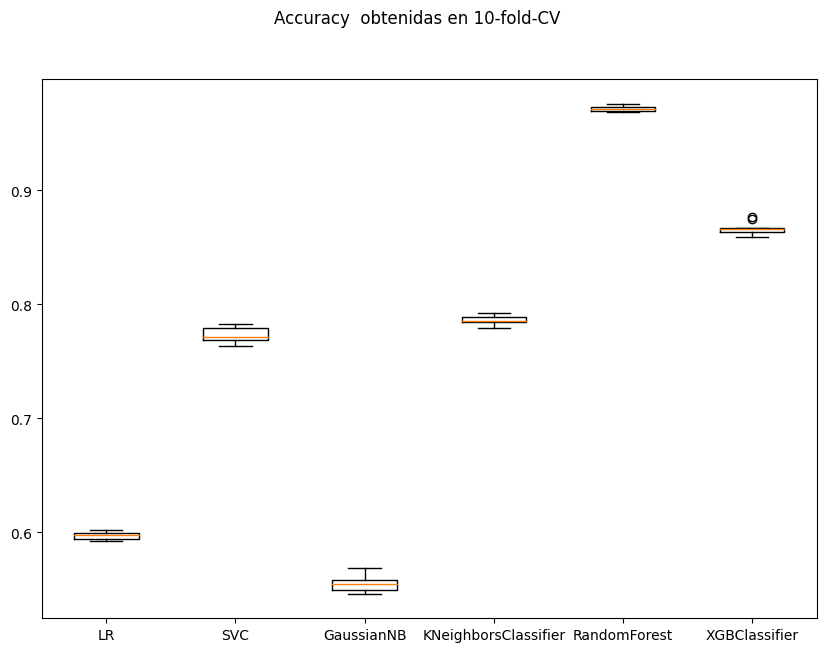

In [59]:
# Muestra graficamente los resultados de neg_mean_absolute_error  en crossvalidacion de los Algoritmos evaluados
fig = plt.figure(figsize=[10,7])
fig.suptitle('Accuracy  obtenidas en 10-fold-CV')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## 2.4) Seleccionar  modelo y reentrenar

He aplicado validación cruzada para determinar el mejor algoritmo y entrenar el modelo, pero ustedes pueden directamente proponer el algoritmo que deseen.

Para los resultados que obtuve, el modelo que obtiene los mejores datos, considerando una menor dispersión de los mismos, es `RF1`.

In [53]:
# Reentrena modelo con todos los datos de entrenamiento y lo prueba en el conjunto de validación
model = RandomForestClassifier(criterion = 'entropy', max_depth=25, n_estimators=70)
model.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=25, n_estimators=70)

### 2.5) Probar modelo en datos de prueba

In [54]:
Y_test_pred = model.predict(X_test)
print("Accuracy score:", accuracy_score(Y_test, Y_test_pred))
print(confusion_matrix(Y_test, Y_test_pred))
print(classification_report(Y_test, Y_test_pred))

Accuracy score: 0.9790717633854888
[[4461   16   37   29    6]
 [  42 2864    1   12    3]
 [  42    3 2621    0    8]
 [  66   15    7 2896    6]
 [  18    0    3    3 1988]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      4549
         1.0       0.99      0.98      0.98      2922
         2.0       0.98      0.98      0.98      2674
         3.0       0.99      0.97      0.98      2990
         4.0       0.99      0.99      0.99      2012

    accuracy                           0.98     15147
   macro avg       0.98      0.98      0.98     15147
weighted avg       0.98      0.98      0.98     15147



In [33]:
print (Y_test)
print (Y_test_pred)

[2. 1. 4. ... 0. 0. 3.]
[2. 1. 4. ... 0. 0. 3.]


### 2.6) Simulando funcionamiento en entorno de juego (solo una salida)

In [34]:
ii_prueba = 321

In [35]:
dataset.shape

(75735, 21)

In [36]:
X_train.shape, X_test.shape

((60588, 20), (15147, 20))

In [37]:
X_test[0].shape

(20,)

In [38]:
print("Predicción del modelo:", model.predict(X_test[ii_prueba].reshape(1,-1)))
print("Etiqueta deseada:",Y_test[ii_prueba])
# no importa que sea diferente, ya que no queremos un modelo perfecto
# lo que queremos es una acción con la misma cantidad de dimensiones en
# el target y en la predicción (1 valor, en nuestro ejemplo del entorno de Pacman)

Predicción del modelo: [1.]
Etiqueta deseada: 1.0


Obtenemos las probabilidades de cada movimiento

In [40]:
probas = model.predict_proba(X_test[ii_prueba].reshape(1,-1))[0]

In [41]:
probas

array([0.        , 0.96453202, 0.        , 0.03546798, 0.        ])

Validamos que las clases estén ordenadas

In [42]:
model.classes_

array([0., 1., 2., 3., 4.], dtype=float32)

Importancia de características

In [43]:
model.feature_importances_

array([0.04115844, 0.03157461, 0.04197228, 0.03179887, 0.0070341 ,
       0.04558646, 0.02597011, 0.03995057, 0.0790645 , 0.00856038,
       0.14387372, 0.12984569, 0.10413497, 0.08712877, 0.0385662 ,
       0.04686653, 0.02315054, 0.02353549, 0.01640345, 0.03382432])

In [44]:
sorted_indices = numpy.argsort(model.feature_importances_)[::-1]
sorted_arr = model.feature_importances_[sorted_indices]
sorted_column_names = [names[i] for i in sorted_indices]

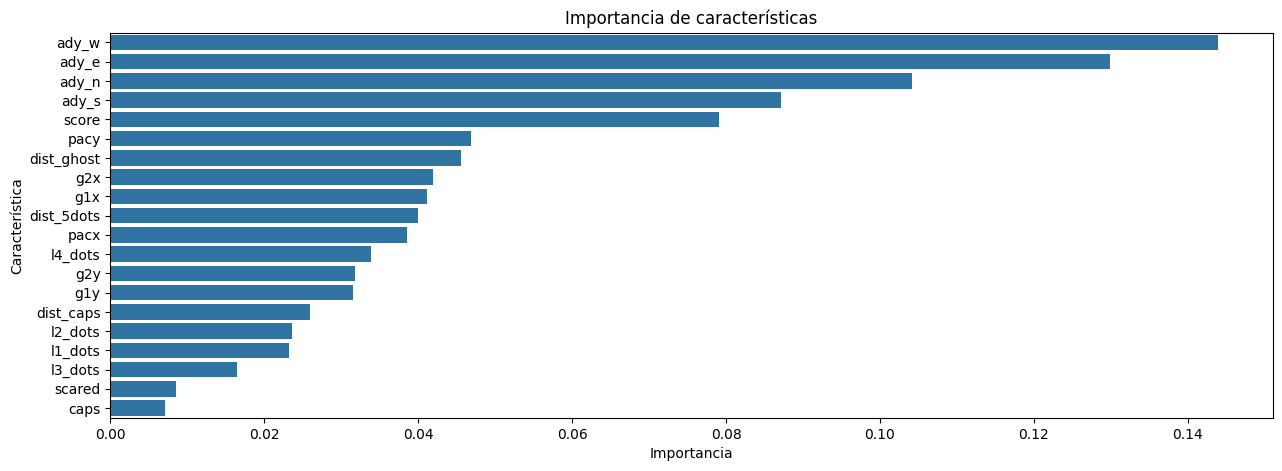

In [45]:
import seaborn as sns
plt.figure(figsize=(15, 5))
sns.barplot(x=sorted_arr, y=sorted_column_names)
plt.title(f'Importancia de características')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

In [46]:
# Obtener la profundidad de cada árbol
depths = [tree.tree_.max_depth for tree in model.estimators_]

# Calcular estadísticas de las profundidades
max_depth = max(depths)
min_depth = min(depths)
avg_depth = sum(depths) / len(depths)

print(f"Profundidad máxima: {max_depth}")
print(f"Profundidad mínima: {min_depth}")
print(f"Profundidad promedio: {avg_depth}")

Profundidad máxima: 25
Profundidad mínima: 25
Profundidad promedio: 25.0


In [47]:
accionList = numpy.flip(numpy.argsort(probas))
accionList

array([1, 3, 4, 2, 0])

### 2.7) Grabando el modelo en un archivo externo

In [49]:
model

RandomForestClassifier(criterion='entropy', max_depth=25, n_estimators=70)

In [50]:
# open a file, where you ant to store the data
archivoModelo = open('modeloEntrenado.p', 'wb')

# dump information to that file
pickle.dump(model, archivoModelo)

archivoModelo.close()

In [51]:
scaler_X

MinMaxScaler()

In [52]:
# open a file, where you ant to store the data
archivoScaler = open('scaler.p', 'wb')
pickle.dump(scaler_X, archivoScaler)
archivoScaler.close()